In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리
from sklearn.datasets import load_linnerud

# 데이터셋 로드

In [99]:
linnerud = load_linnerud()

In [100]:
linnerud

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [101]:
df = pd.DataFrame(linnerud.data, columns = linnerud.feature_names)

In [102]:
df

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0
5,4.0,101.0,42.0
6,8.0,101.0,38.0
7,6.0,125.0,40.0
8,15.0,200.0,40.0
9,17.0,251.0,250.0


In [103]:
df_target = pd.DataFrame(linnerud.target, columns = linnerud.target_names)

In [104]:
df_target

,Weight,Waist,Pulse
0,191.0,36.0,50.0
1,189.0,37.0,52.0
2,193.0,38.0,58.0
3,162.0,35.0,62.0
4,189.0,35.0,46.0
5,182.0,36.0,56.0
6,211.0,38.0,56.0
7,167.0,34.0,60.0
8,176.0,31.0,74.0
9,154.0,33.0,56.0


In [105]:
data = pd.concat([df,df_target], axis = 1)

In [106]:
data

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


# EDA

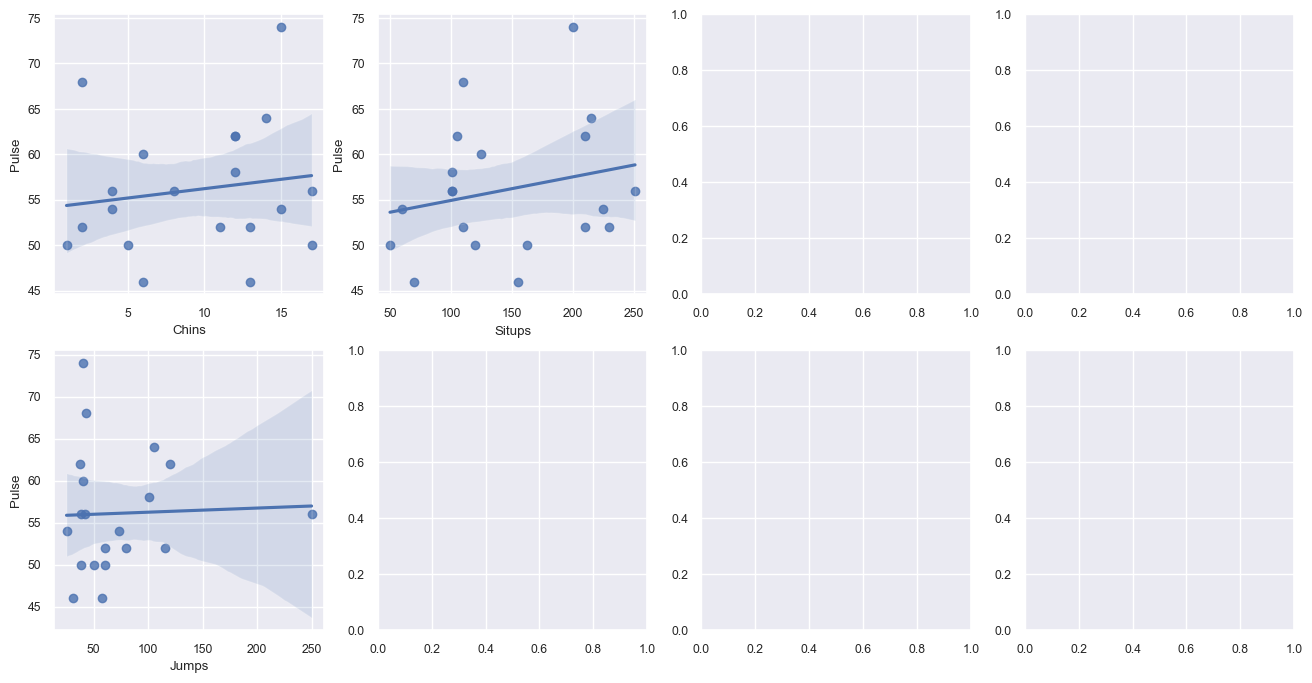

In [107]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

lm_features = ['Chins','Situps','Jumps']

# i에는 인덱스가 feature에는 RM ~ RAD까지 순차적으로 들어감
for i, feature in enumerate(lm_features):
    row = int(i/2)
    col = i%2

    # sns.regplot : 회귀직선을 그려줌
    sns.regplot(x=feature, y='Pulse', data=data, ax=axs[row][col])

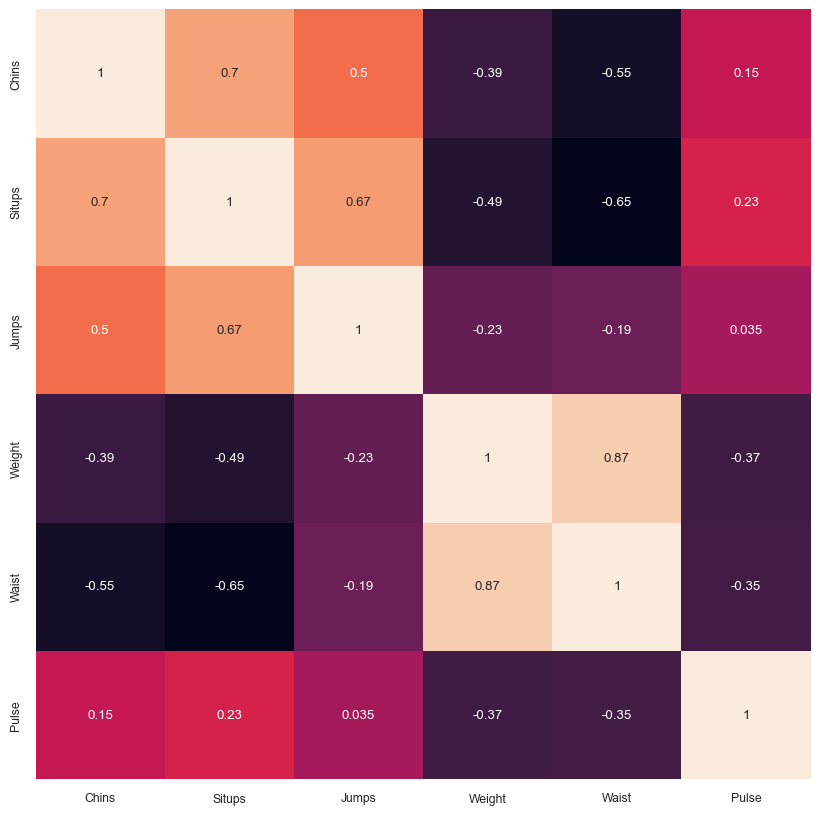

In [108]:
df_corr = data.corr()
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# 학습 및 Regression 4개 수행 (SVR, DT, RT, LR) 

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [110]:
x_data=data.loc[:, ['Situps', 'Chins','Jumps']]
y_data=data.loc[:, 'Waist']
X_train, X_test, y_train, y_test=train_test_split(x_data,
                                                  y_data,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16, 3) (16,)
(4, 3) (4,)


In [111]:
dt =  DecisionTreeRegressor()
rt = RandomForestRegressor()
lr = LinearRegression()
sv = SVR()

In [112]:
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
dt_mse = mean_squared_error(y_test, pred_dt)
print(dt.score(X_train, y_train))

1.0


In [113]:
mse1 = np.sqrt(mean_squared_error(pred_dt, y_test))
print('평균제곱근오차', mse1)

평균제곱근오차 5.744562646538029


In [114]:
rt.fit(X_train, y_train)
pred_rt = rt.predict(X_test)
rt_mse = mean_squared_error(y_test, pred_rt)
print(rt.score(X_train, y_train))

0.8888457564575644


In [115]:
mse2 = np.sqrt(mean_squared_error(pred_rt, y_test))
print('평균제곱근오차', mse2)

평균제곱근오차 5.052350937929788


In [116]:
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, pred_lr)
print(lr.score(X_train, y_train))

0.7694109964366305


In [117]:
mse3 = np.sqrt(mean_squared_error(pred_lr, y_test))
print('평균제곱근오차', mse3)

평균제곱근오차 4.933048668359943


In [118]:
sv.fit(X_train, y_train)
pred_sv = sv.predict(X_test)
sv_mse = mean_squared_error(y_test, pred_sv)
print(lr.score(X_train, y_train))

0.7694109964366305


In [119]:
mse4 = np.sqrt(mean_squared_error(pred_sv, y_test))
print('평균제곱근오차', mse4)

평균제곱근오차 5.209850558567236


In [120]:
sv.fit(X_train, y_train)
dt.fit(X_train, y_train)
rt.fit(X_train, y_train)
lr.fit(X_train, y_train)

# 각각의 모델의 성능을 평가합니다.
print("SVR score:", sv.score(X_test, y_test))
print("Decision Tree score:", dt.score(X_test, y_test))
print("Random Forest score:", rt.score(X_test, y_test))
print("Linear Regression score:", lr.score(X_test, y_test))

SVR score: 0.10272585644286458
Decision Tree score: 0.03305785123966942
Random Forest score: 0.15544380165289284
Linear Regression score: 0.19553820944106426


# PolynomialFeature 사용하여 과대적합을 유도

In [121]:
# 필요한 라이브러리를 임포트합니다.
from sklearn.preprocessing import PolynomialFeatures

# 2차 다항식을 만들기 위해 PolynomialFeatures를 사용합니다.
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(x_data)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y_data, test_size=0.2, random_state=42)

# 각각의 모델을 학습시킵니다.
sv.fit(X_train, y_train)
dt.fit(X_train, y_train)
rt.fit(X_train, y_train)
lr.fit(X_train, y_train)

# 각각의 모델의 성능을 평가합니다.
print("SVR score:", sv.score(X_test, y_test))
print("Decision Tree score:", dt.score(X_test, y_test))
print("Random Forest score:", rt.score(X_test, y_test))
print("Linear Regression score:", lr.score(X_test, y_test))

SVR score: -0.12408951600905449
Decision Tree score: -1.176470588235294
Random Forest score: -0.3412058823529416
Linear Regression score: -7.084660687017896


# Ridge와 Lasso로 해결

In [129]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [136]:
ridge = Ridge(alpha = 10)
lasso = Lasso(alpha = 10)

In [143]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_data, test_size=0.2, random_state=42)

# Ridge 모델 학습 및 예측
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Lasso 모델 학습 및 예측
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# MSE 출력
print("Ridge MSE: ", mean_squared_error(y_test, y_pred_ridge))
print("Lasso MSE: ", mean_squared_error(y_test, y_pred_lasso))

Ridge MSE:  24.566838530816312
Lasso MSE:  8.32608367784208


C:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.596e+01, tolerance: 1.777e-02
  model = cd_fast.enet_coordinate_descent(


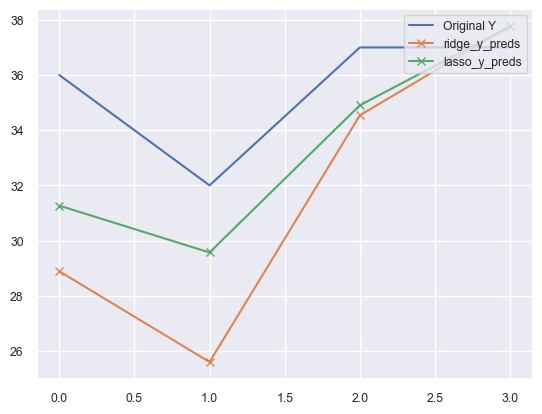

In [145]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(range(len(y_test)), y_test, '-', label="Original Y")
ax.plot(range(len(y_test)), y_pred_ridge, '-x', label="ridge_y_preds")
ax.plot(range(len(y_test)), y_pred_lasso, '-x', label="lasso_y_preds")

plt.legend(loc='upper right')
plt.show()